In [1]:
import numpy as np
import itertools as it
import random as r
import matplotlib.pyplot as plt

Combos:  [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
Completed all iterations. Preferred State = [4, 2, 1, 3] 
 Distance = 5257 
 Average Accepance = 0.322
Histy =  [986, 1000, 14, 14, 1000, 986]


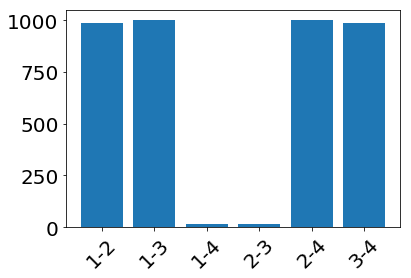

[4, 2, 1, 3]


In [2]:
#Code written by Greg Sheppard

#From www.DistanceCalculator.net
#The dimensions of this matrix represent the number of cities and are used for generating matrix lists
distMX = np.matrix(
         [[0,2448,1744,2594],
          [2448,0,726,215],
          [1744,726,0,850],
          [2594,215,850,0]])
        
# Calculates the total travel distance required using distMX based on values in adjMX 
def CalcDistance(adjMX, p=False):
    # Adjacency matrix represents a given path between cities and is multiplied by the distance matrix for total distance travelled
    n = len(adjMX)
    sumDist = 0
    for i in range(0,n): #Iterate through lists
        for j in range(0,n): #Iterate through each index in given list
            if (adjMX[i,j] == 1):
                #print('INPUT: \n i = %s and j = %s \n OUTPUT \n %s' % (i, j, distMX[i,j]))
                sumDist += distMX[i,j]
                if (p == True):
                    print('Added city at %s, %s - Total Distance = %s' % (i, j, sumDist))
                
    return sumDist # Returns the total distance for a given travel path

# Generates all possible orderings for a given list of cities
# This is a part of the BRUTE FORCE method
def GenerateMXList(state=[1,2,3,4,5,6,7]):
    #Generate list of all possible permutations of city travel paths
    orders = list(it.permutations(state, len(state)))
    MXList = [] #Blank list to append matrices into
    #Cycle through every travel permutation
    for o in orders:
        blank = [0]*len(state)
        newMX = np.matrix([blank]*len(state))
        buildMX(o, newMX)
        MXList.append(newMX)
        
    return orders, MXList

# Generates a given adjacency matrix for any state (path) input
def buildMX(order, newMX):
    n = len(newMX)
    o = order
    for x in range(0,n):
        i = o[x] - 1
        if x+1 >= n:
            j = o[0] - 1
        else:
            j = o[x+1] - 1
        newMX[i, j] = 1
    return newMX

# Utilizes SIMULATED ANNEALING method to efficiently determine an optimal travel path
# Since the possible orderings increase exponentially with the number of cities, this method works for larger n (e.g. 12) whereas
# brute force quickly breaks down due to extremely large computation times.
def Anneal(distMX, To=500, state=[1,2,3,4,5,6,7], beta=0.95, iterations=1000):
    S = state
    B = beta
    k = 0
    n = len(state)
    d = 0
    T = To
    Tk = To
    accepted = 0
    
    #Creating list of all combinations for later histogram
    combos = list(sorted(it.combinations(S, 2)))
    print('Combos: ', combos)
    c = []
    for i in range(0,len(combos)): #Fixes issues with improperly sorted combinations (e.g. 4-1 should be 1-4)
        if combos[i][0] > combos[i][1]:
            c.append((combos[i][1], combos[i][0]))
            print('Changing %s to %s' % (combos[i], c[i]))
        else:
            c.append((combos[i][0], combos[i][1]))
    #print('Sorted Combos: ', sorted(c))
    
    #Creating basis for later histogram of preferred paths
    histRange = [None]
    for i in range(0,len(c)):
        histRange.append(str(c[i][0])+'-'+str(c[i][1]))
    histRange.remove(None)
    histRange = sorted(histRange)
    hist = [0]*len(histRange)
    
    #Iterates through a desired number of runs
    while k < iterations:
        #Begin creating adjMX for S and S'
        blank = [0]*len(state)
        blankMX = np.matrix([blank]*len(state))
        SMX = buildMX(S, blankMX)
        blank = [0]*len(state)
        blankMX = np.matrix([blank]*len(state))
        Sp = state
        Sp = r.sample(Sp, len(Sp))
        SpMX = buildMX(Sp, blankMX)
        Tk = B*Tk
        #Beginning of actual simulated annealing process
        dS = CalcDistance(SMX)
        dSp = CalcDistance(SpMX)
        d = dSp - dS
        #print('S = %s \n Sp = %s' % (S, Sp))
        #print('d = %s if D(S) = %s and D(Sp) = %s' % (d, dS, dSp))
        
        z = r.random()
        #Accepts or rejects new state
        if (d <= 0):
            #print('Changing state %s to new state %s due to d<=0' % (S, Sp))
            S = Sp
            accepted += 1
        elif (np.exp(-d/Tk) >= z): 
            #print('Changing state %s to new state %s because exp less than %s' %(S, Sp, z))
            S = Sp
            accepted += 1
        #else:
            #print('Kept state %s over new state %s' % (S, Sp))
        
        #Adds to current histogram based on this iteration's preferred state
        for i in range(0, len(S)):

            #Produces start and end points for each individual trip
            if (i < len(S)-1):
                st = S[i]
                end = S[i+1]
            else:
                st = S[i]
                end = S[0]

            #Creates a string to find the proper trip in histRange
            if st > end:
                trip = str(end)+'-'+str(st)
            else:
                trip = str(st)+'-'+str(end)

            ind = histRange.index(trip)
            hist[ind] += 1
            
        #Progress 1 iteration
        #print(hist)
        k += 1
        
    blank = [0]*len(state)
    newMX = np.matrix([blank]*len(state))
    
    bestDistance = CalcDistance(buildMX(S, newMX))
    print('Completed all iterations. Preferred State = %s \n Distance = %s \n Average Accepance = %s' % (S, bestDistance, accepted/iterations))
    return hist, histRange, S, bestDistance
    
# Plots the number of times a given city-city subpath was chosen via simulated annealing
histy, histyRangey, state, dist = Anneal(distMX, state=[1,2,3,4], beta=0.9, To=500, iterations=1000)
print('Histy = ', histy)
plt.bar(range(len(histy)), histy, align='center')
plt.xticks(range(len(histy)), histyRangey, rotation=45)
plt.tick_params(labelsize=20)

plt.show()
print(state)

In [5]:
# BRUTE FORCE method of determining the path with the lowest total distance

orders, MXList = GenerateMXList(state=[1,2,3,4])
dMin = 10**10
dList = []
bestMX = None
for m in range(0,len(MXList)):
    d = CalcDistance(MXList[m])
    dList.append(d)
    if d is not None and d < dMin:
        dMin = d
        orderMin = orders[m]
        bestMX = MXList[m] 
        
print('Minimum Distance: %s \n Best Order: %s \n Ideal Adjacency Matrix: \n %s' % (dMin, orderMin,bestMX))
print(CalcDistance(bestMX, p=True))
print(sorted(list(set(dList))))

Minimum Distance: 5257 
 Best Order: (1, 2, 4, 3) 
 Ideal Adjacency Matrix: 
 [[0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]]
Added city at 0, 1 - Total Distance = 2448
Added city at 1, 3 - Total Distance = 2663
Added city at 2, 0 - Total Distance = 4407
Added city at 3, 2 - Total Distance = 5257
5257
[5257, 5279, 6618]
